/var/folders/zl/rfmhdm4j0tq649k2ty3ggbf80000gn/T/ipykernel_24936/2961283455.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


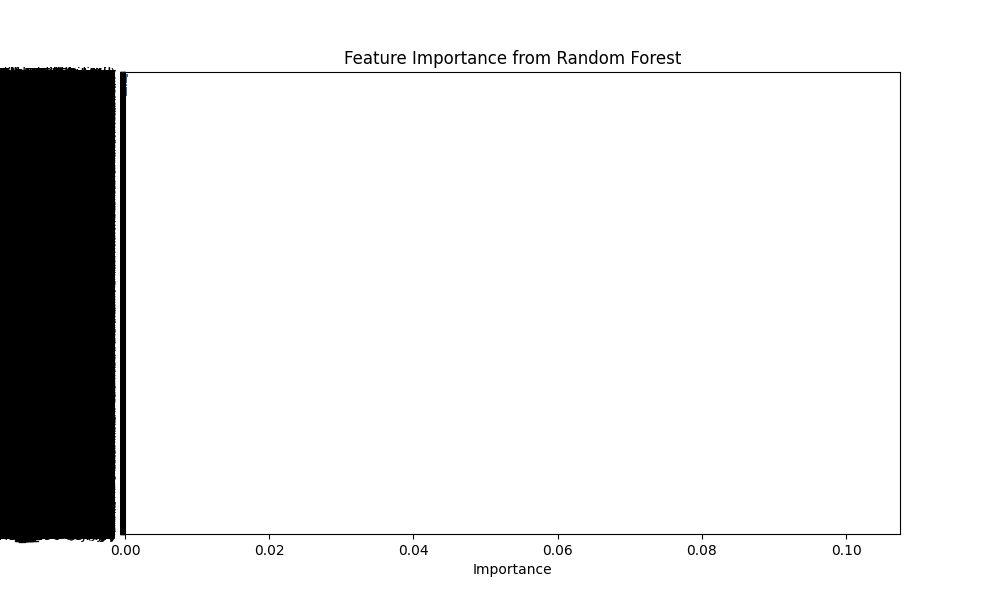

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('/Users/shivambhola/Desktop/Python/data/telco_customer_churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)

X = df_encoded.drop('Churn_Yes', axis=1)
y = df_encoded['Churn_Yes']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importances = model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importance from Random Forest')

plt.savefig('/Users/shivambhola/Desktop/Python/visualizations/feature_importance.png')
plt.close()

from IPython.display import Image
Image(filename='/Users/shivambhola/Desktop/Python/visualizations/feature_importance.png')